In [1]:
%matplotlib ipympl
from animate_schrodinger import animate_schrodinger_function

# Task 1

1. Start the simulation with the default settings for barrier height, barrier thickness, particle
energy/momentum and particle mass. Pause the simulation once the wave has completely
propagated though the barrier by left clicking on the plot window. You can close the window
and restart the simulation of you missed the “sweet time spot”. Clicking on the plot again
resumes the time evolution simulation. (10 pts)

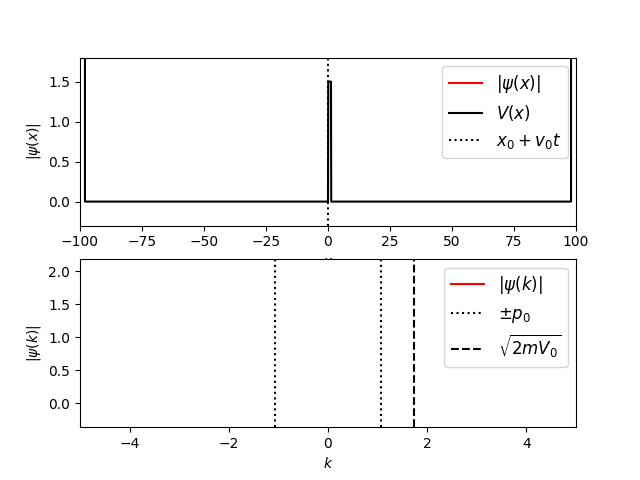

In [4]:
animate_schrodinger_function(m = 1.9, V0 = 1.5, width_as_multiple_of_L = 3)

2. Repeat the simulation, changing one parameter, for example the barrier thickness. What
happens to the transmitted wave function? If your transmission probability has dropped so low
that you cannot see the transmitted wave function anymore, reduce the amount of change in
the parameter value. (10 pts)

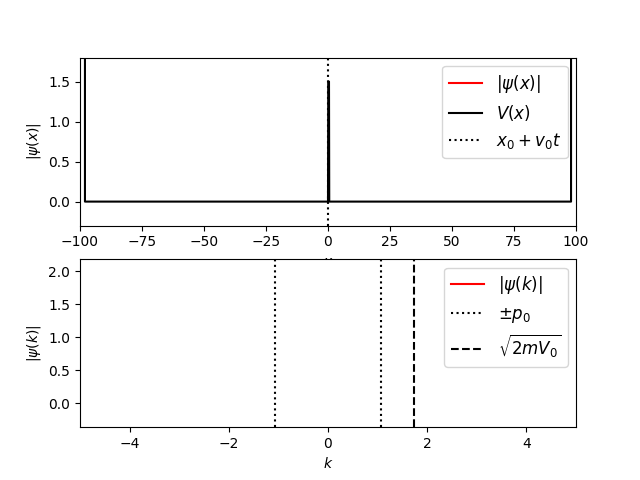

In [5]:
animate_schrodinger_function(m = 1.9, V0 = 1.5, width_as_multiple_of_L = 1)

3. Repeat the simulation but change another parameter. You can reset the first parameter to its
original value or leave it as-is. What happens to the transmitted wave function? (10 pts)

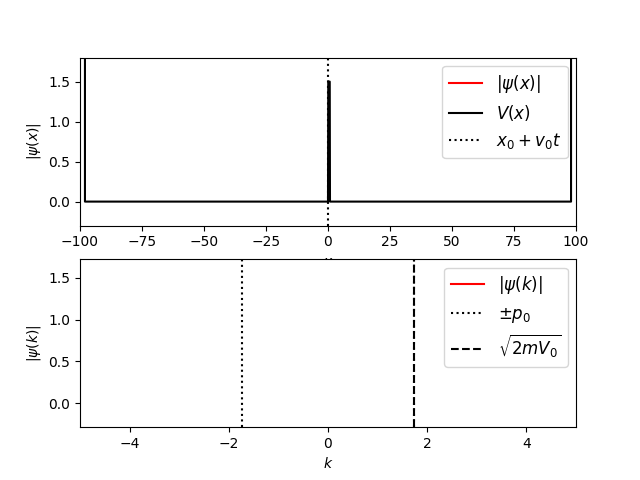

In [6]:
animate_schrodinger_function(m = 5, V0 = 1.5, width_as_multiple_of_L = 3)

Decreasing the barrier width increased the amplitude of the transmitted wave function.  Increasing the particle mass also increased the transmitted amplitude, but to a lesser extent.

# Task 2

While the code provides you with nice plots of the absolute wave function amplitude, you are interested in the transmission probability T, which is the ratio between the probability of the particle being transmitted (P(x > x_barrier, t)) and the probability of the particle being reflected (P(x < x_barrier,t)). The two probabilities correspond to the integral of the wave function square in the respective regions. Since the barrier is thin and located around x=0, in the middle of the simulation interval, you can perform an integration from the start of the array until the middle and then from the middle until the end of the array of y data points.

You can access the y data points as part of the psi_x_line Line2D matplotlib object. The following code snippet will copy the y data set to a variable called y_data that you can use for numeric integration:
y_data = psi_x_line.get_ydata()

Although the program claims that the wave function is normalized, it seems that the Gaussian is missing a scaling factor that maintains normalization over time. Since we are only interested in the ratio between transmitted and reflected amplitude squared, any error in normalization does not affect the calculation of the transmission probability T.
In this task, you need to write code which determines the transmission probability T at the time when the wave packet has propagated though the barrier, like the screengrab you prepared in Task 1.

Hint: You can add your code to the plot pause event handling routine. You can either perform the calculation within the pause routine or add another check, for example for the left mouse button, which then triggers the calculation. Printing the value to the console is fine, since you are only interested in the numeric value for T.

1. Write the code that calculates the two numeric integrals and determines the tunneling probability based on the ration of the wave function amplitude squares. Re-run the simulation with the default parameters like in Task 1.1, pausing the simulation when the wave has propagated though the barrier and determine the value for T. **Copy your code snippet and the output for the value of T into your report.** (20 pts)

Code snippet added to `on_click` function:

          
```
  if include_tunnel_prob == True: #parameter of wrapper function at top of file, set to false by default
    x_data = psi_x_line.get_xdata()
    y_data = psi_x_line.get_ydata()
    y_data_conj = np.conj(y_data)
    PDF = y_data*y_data_conj

    temp = pd.DataFrame({'y':PDF, 'x':x_data})
    reflected = temp >> filter_by(X.x >= 0)
    transmitted = temp >> filter_by(X.x <= 0)

    reflected_prob = np.trapz(reflected['y'].tolist(), x = reflected['x'].tolist())
    transmitted_prob = np.trapz(transmitted['y'].tolist(), x = transmitted['x'].tolist())
    tunnel_prob = transmitted_prob/(reflected_prob + transmitted_prob)

    tx.set_text(f'Tunneling probability = {round(tunnel_prob, 5)}')
    # defined above function body as tx = ax1.text(-90, 1.5, '')

    
```


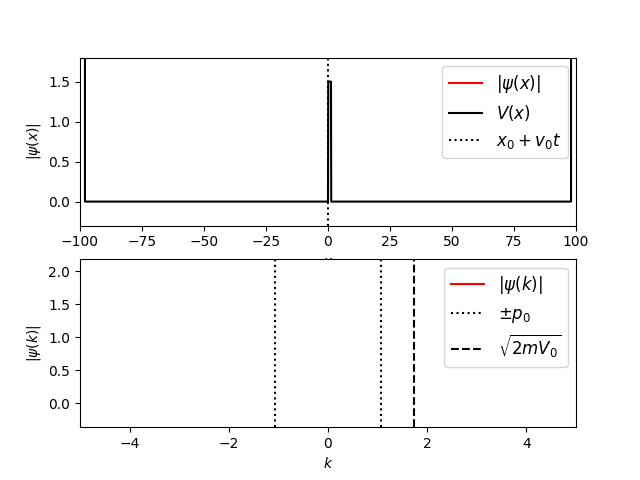

In [2]:
animate_schrodinger_function(m = 1.9, V0 = 1.5, width_as_multiple_of_L = 3, include_tunnel_prob = True)

2. Re-run the simulation with a changed parameter set like in Task 1.2 or 1.3, pausing the simulation when the wave has propagated though the barrier and determine the value for T. **List the parameters used and copy your output for the value of T into your report.** (20 pts)

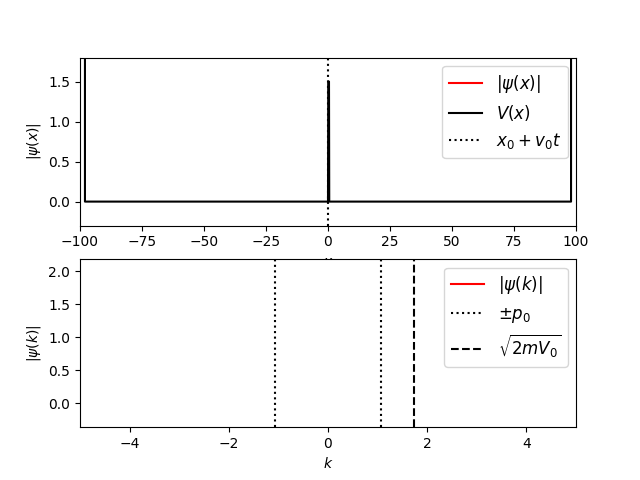

In [3]:
animate_schrodinger_function(m = 1.9, V0 = 1.5, width_as_multiple_of_L = 1, include_tunnel_prob = True)

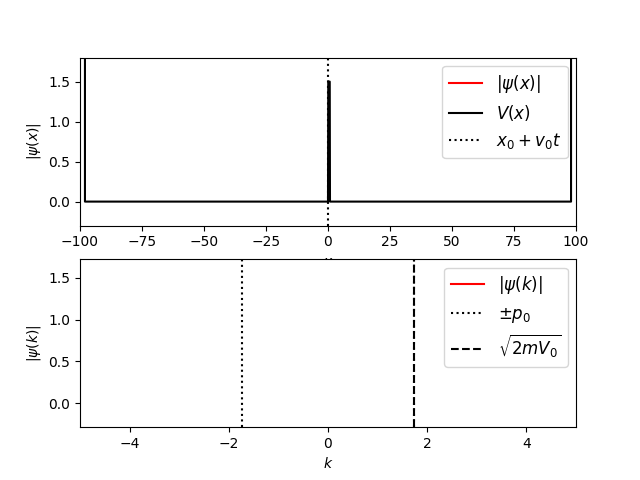

In [4]:
animate_schrodinger_function(m = 5, V0 = 1.5, width_as_multiple_of_L = 3, include_tunnel_prob = True)

# Task 3 
Although the tunneling probability calculation in Task 2 should produce correct values, it makes sense to check the answers against the simulation based on transfer matrices that NanoHub uses. In order to compare the data, you need to translate the parameters used in your simulation to the parameters that NanoHub expects in its “Piece-Wise Constant Potential Barrier Tool” as part of the AQME simulator: https://nanohub.org/tools/aqme/ The simulator requires the following parameters as inputs:

• Barrier height in eV
• Effective mass as a multiplier
• Barrier thickness in nm
• Electron energy in eV for the readout of T(E)

The code you use in Task 1 uses relative values, requiring you to make a choice regarding the absolute energy scale. I suggest using eV as the energy scale. You can also try to use Rydberg as the energy scale (1 Ry = 13.6 eV), but NanoHub might have trouble converging with these values.

To compare the tunneling probability with your answer from Task 2.1, you should perform a **Piece-Wise Constant Potential Barrier Tool simulation in NanoHub** and take **screengrabs of the three setup screens** as well as **the default output (Potential Profile, Transmission data and Bandstructure)** and **the Transmission Coefficient vs Energy on refined energy grid**. In addition, **use the cursor and position it at the particle energy you determined and copy the corresponding value for the tunnel probability. Copy that value into your report**. Alternatively, you can download the data as CSV and upload it to Canvas. It must be the data corresponding to the refined grid; other data is not acceptable. (30 pts)

Hint: The numeric values for T should match closely for the default case. For extra credit, you can repeat the NanoHub simulation for your second simulation in Task 2.2.

### Setup Screens
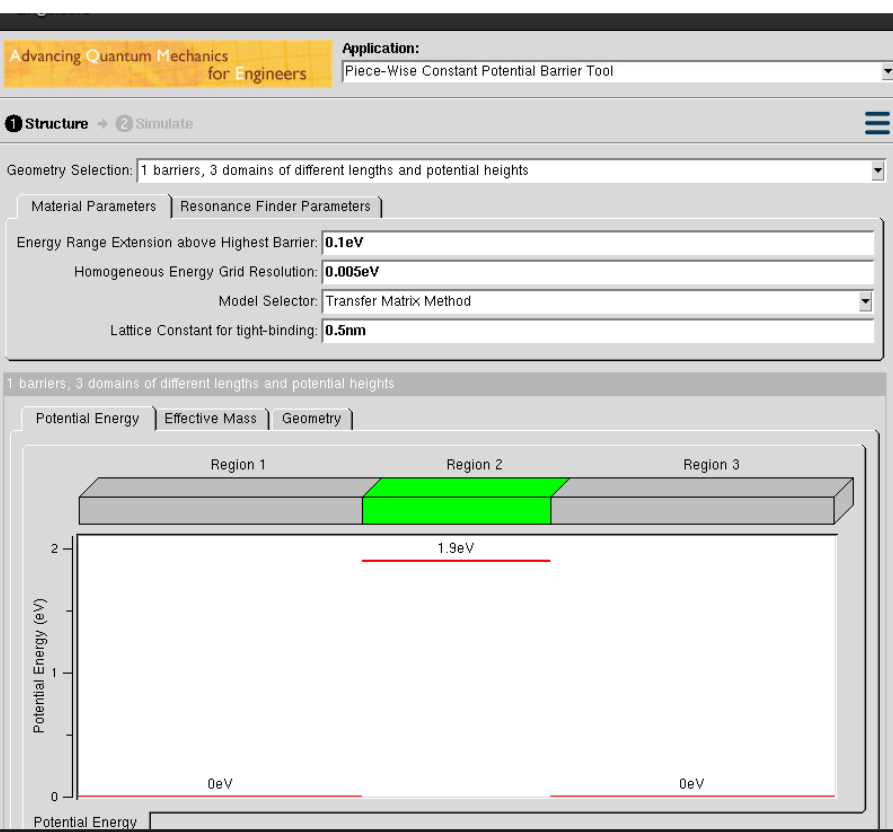
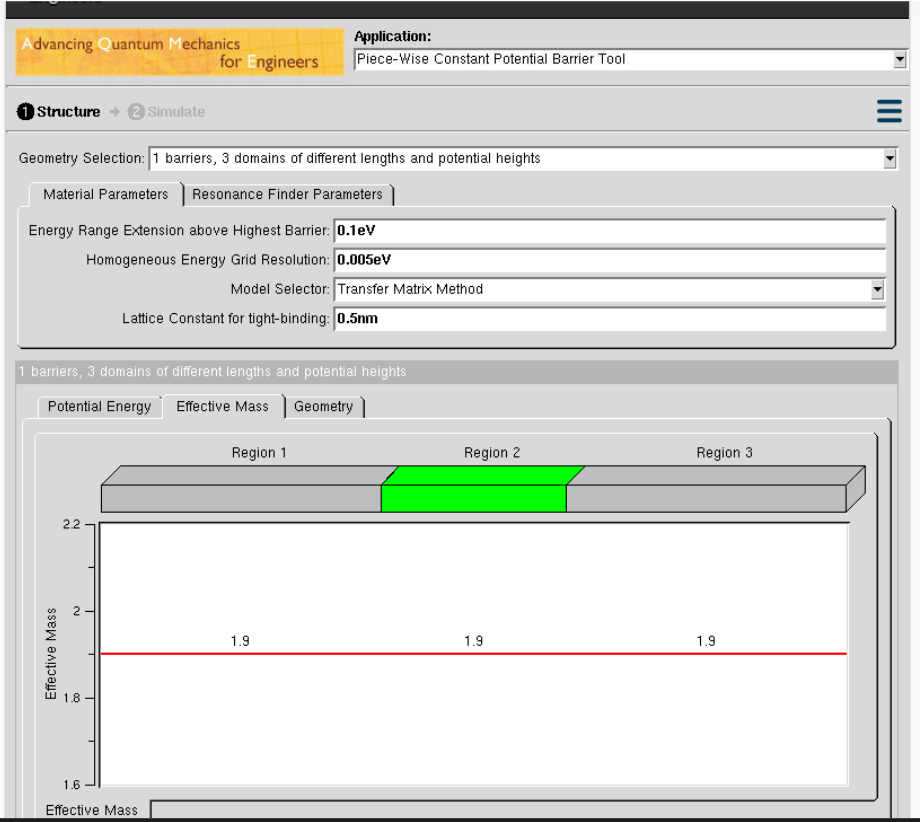
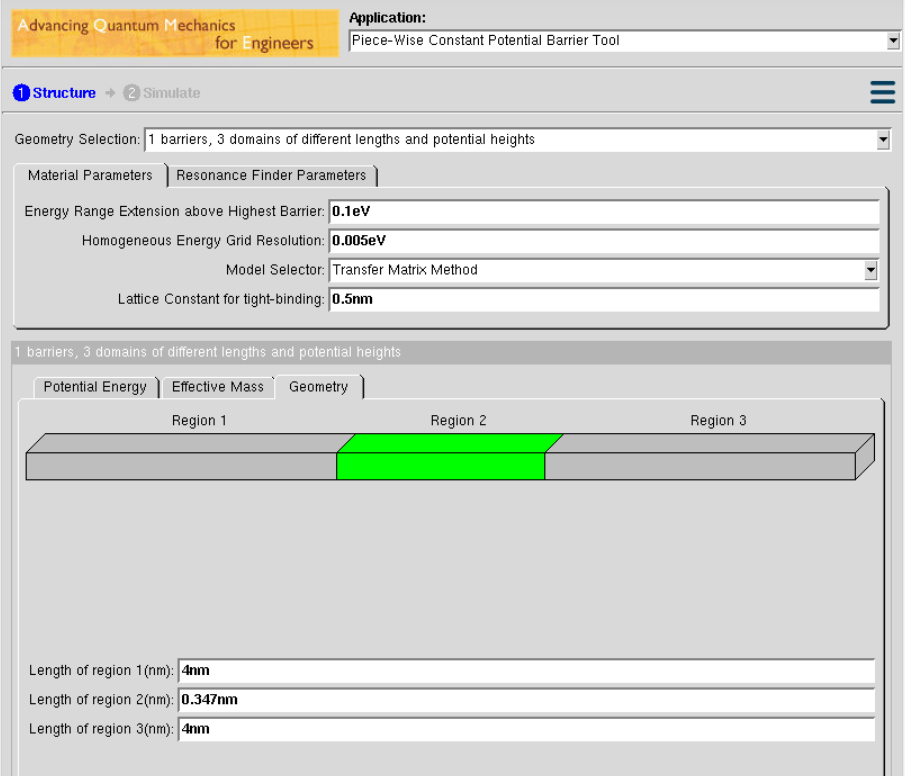

## Output Screens

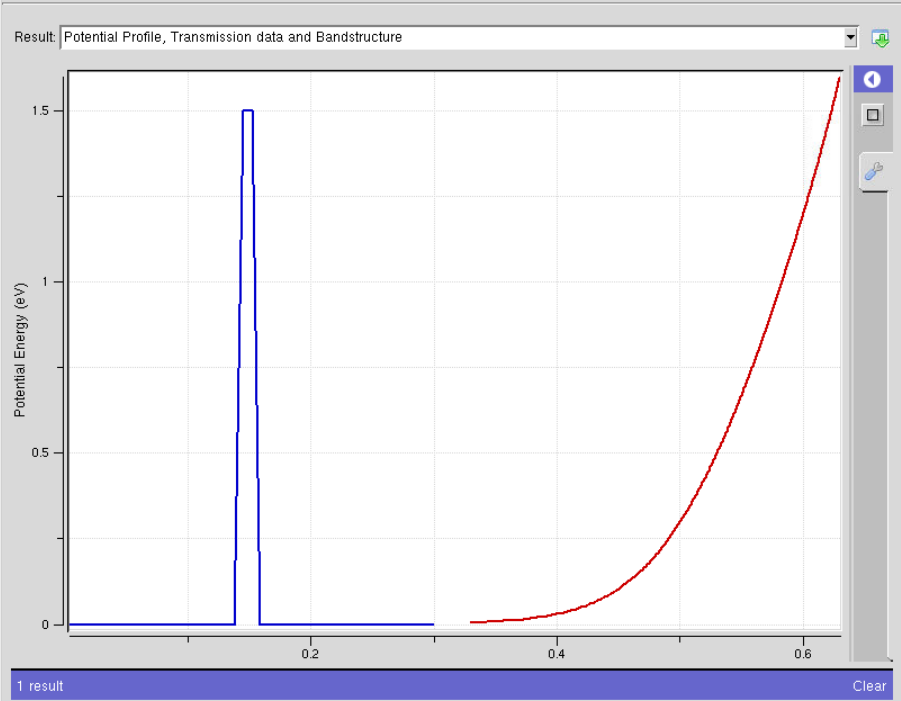

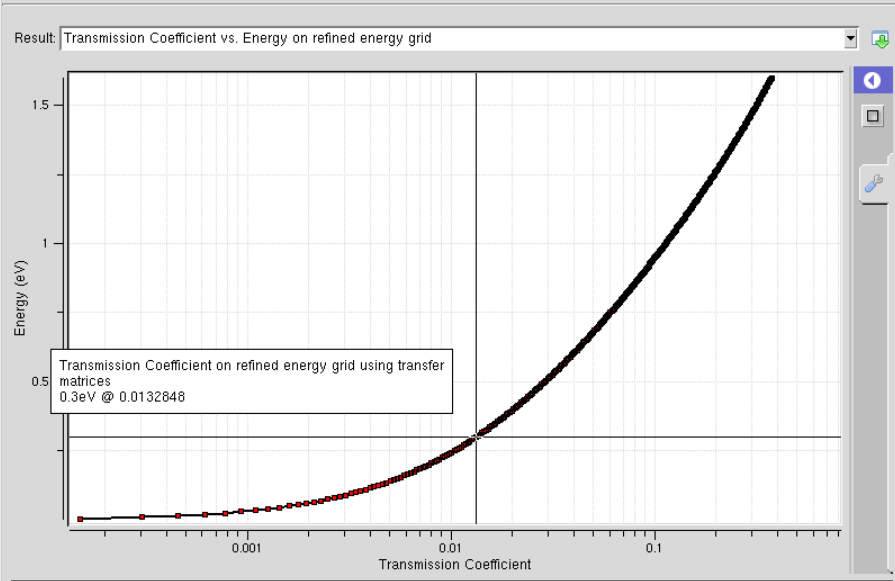

# Bonus

$w = L$

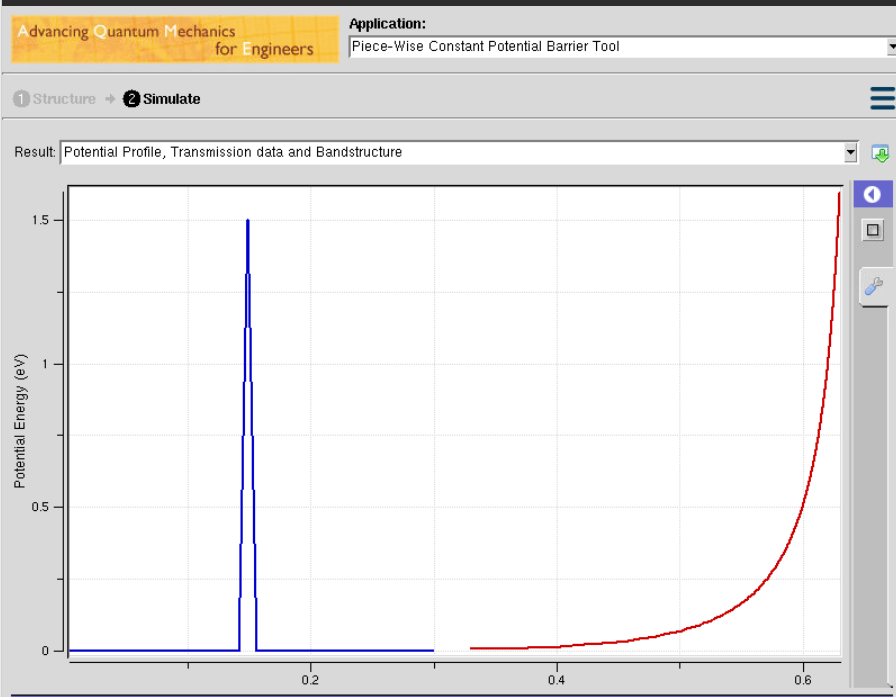

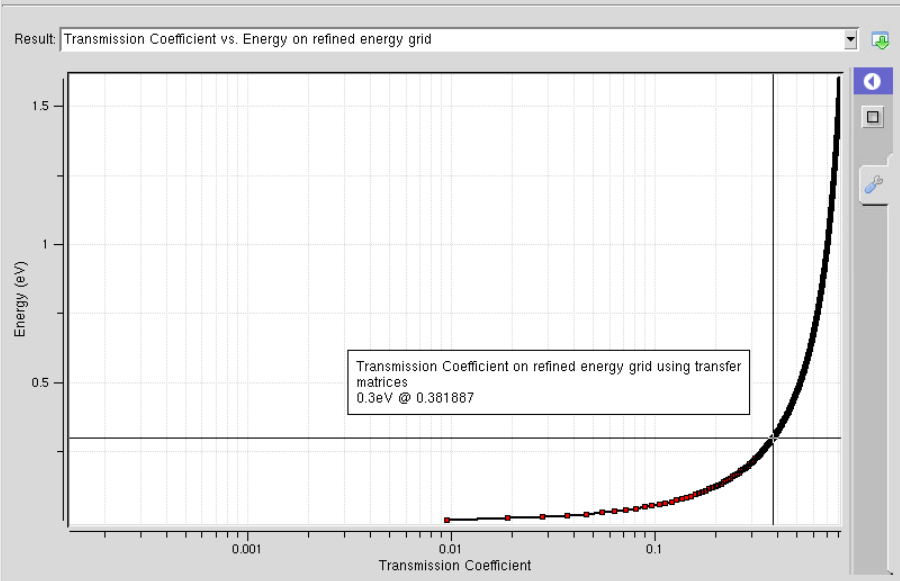